In [1]:
import geopandas as gpd
from geopandas import GeoDataFrame
import geoplot
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from sklearn import cluster
import numpy as np

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%run -i ../notebooks/functions.py

In [3]:
master_df = pd.read_csv('../processed_data/master.csv')

In [43]:
X = master_df
max_k = 10

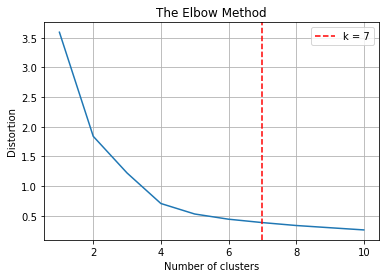

In [5]:
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
        model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=100)
        model.fit(X)
        distortions.append(model.inertia_)

k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))

fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [44]:
k = 5
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = master_df
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)

## add clustering info to the original dataset
master_df[["cluster"]] = dtf_X[["cluster"]]

In [42]:
df_list = []
#for each cluster seperate from master dataframe and append to list
for i in range(0, k):
    df_list.append(master_df.loc[master_df['cluster'] == i])
    
df_list[0].head()

,NTA_lat,NTA_long,Population,traffic,ped_traffic,count_x,acres,count_y,PARKING LOTS AND GARAGES,NON-PUBLIC K-12 SCHOOLS,HOSPITALS AND CLINICS,PUBLIC K-12 SCHOOLS,"STREETSCAPES, PLAZAS, AND MALLS",BUS DEPOTS AND TERMINALS,MUSEUMS,COLLEGES OR UNIVERSITIES,cluster
0,40.525528,-74.233554,23313,104.606481,0.0,1.0,443.237,2.0,19.0,3.0,0.0,3.0,1.0,1.0,1.0,0.0,0
1,40.528645,-74.187734,27770,446.743056,0.0,1.0,697.744,1.0,3.0,2.0,2.0,3.0,1.0,0.0,0.0,0.0,0
2,40.540334,-74.207828,20763,572.143519,0.0,0.0,315.840,1.0,1.0,1.0,0.0,4.0,0.0,1.0,1.0,0.0,0
5,40.552660,-74.188482,25238,647.849537,0.0,0.0,241.336,0.0,1.0,4.0,0.0,2.0,3.0,0.0,0.0,0.0,0
6,40.561996,-74.122590,22049,256.717593,0.0,1.0,207.108,0.0,1.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0


In [31]:
#zip each clustered dataframe in the list
cluster_dfs = llz_set(df_list)

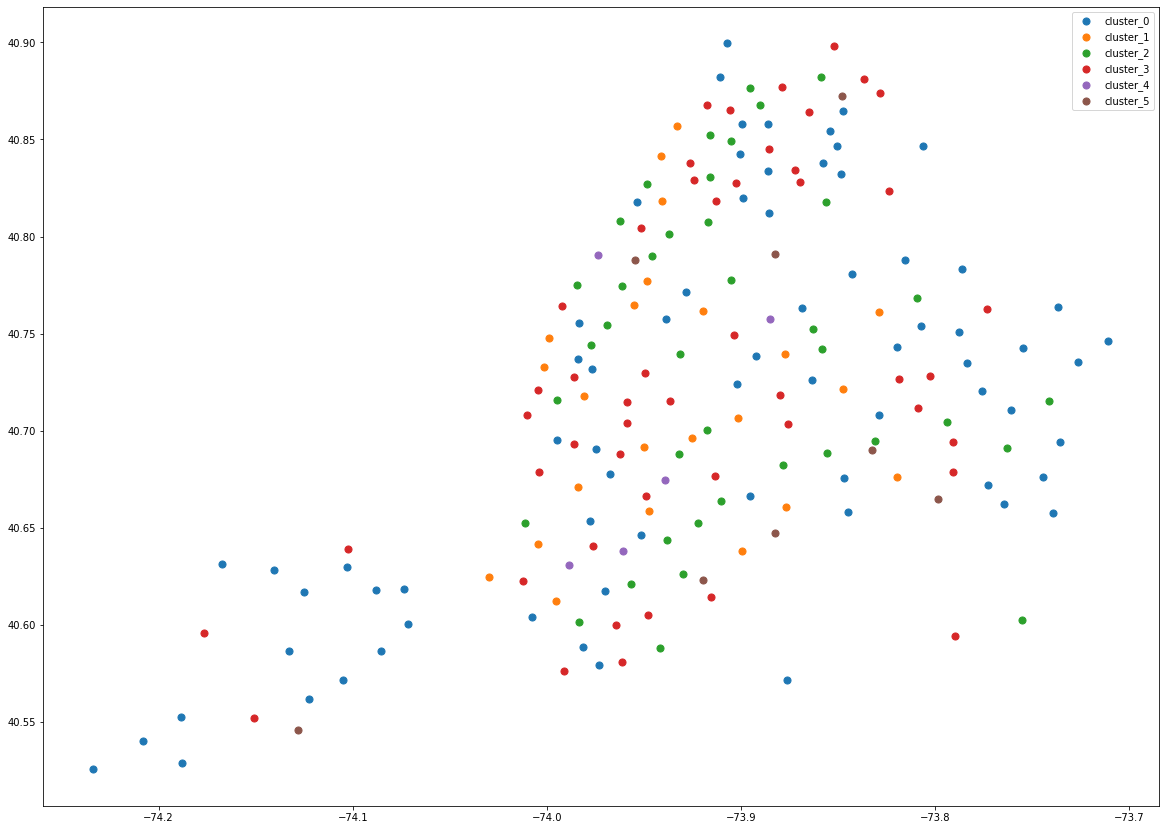

In [41]:
 # Import NYC Neighborhood Shape Files
fig,ax=plt.subplots(figsize=(20,20))
boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))
boroughs.plot(ax=ax,alpha=0.4,color="grey")

#loop through each cluster
for i in range(len(cluster_dfs)):
    cluster_dfs[i].plot(ax = ax, markersize = 50, marker = 'o', label = f"cluster_{i}")

plt.legend()